## 최신 기출동형 모의고사 - 제3회 기출동형 모의고사
### 1. 머신러닝 (50점)

#### (1) 데이터를 탐색하고 탐색 결과를 제시하시오.

In [1]:
import pandas as pd
import numpy as np 
hotel = pd.read_csv('../data/hotel_bookings.csv')
hotel

# 결측치 확인
hotel.isna().sum()

is_canceled                          0
deposit_type                         0
lead_time                            5
stays_in_weekend_nights              0
stays_in_week_nights                 0
is_repeated_guest                  358
previous_cancellations               0
previous_bookings_not_canceled       0
booking_changes                      0
days_in_waiting_list                 0
adr                               1063
dtype: int64

In [2]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     20000 non-null  int64  
 1   deposit_type                    20000 non-null  object 
 2   lead_time                       19995 non-null  float64
 3   stays_in_weekend_nights         20000 non-null  int64  
 4   stays_in_week_nights            20000 non-null  int64  
 5   is_repeated_guest               19642 non-null  float64
 6   previous_cancellations          20000 non-null  int64  
 7   previous_bookings_not_canceled  20000 non-null  int64  
 8   booking_changes                 20000 non-null  int64  
 9   days_in_waiting_list            20000 non-null  int64  
 10  adr                             18937 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 1.7+ MB


In [3]:
hotel.deposit_type.describe()

count          20000
unique             3
top       No Deposit
freq           19138
Name: deposit_type, dtype: object

In [4]:
hotel.groupby(hotel['deposit_type']).mean()['adr']

deposit_type
No Deposit    101.965190
Non Refund     89.689476
Refundable     67.456154
Name: adr, dtype: float64

#### (2) 결측치를 탐색하고 대체 방법 및 근거를 제시하시오.

In [5]:
# 결측치 확인
hotel.isna().sum()

is_canceled                          0
deposit_type                         0
lead_time                            5
stays_in_weekend_nights              0
stays_in_week_nights                 0
is_repeated_guest                  358
previous_cancellations               0
previous_bookings_not_canceled       0
booking_changes                      0
days_in_waiting_list                 0
adr                               1063
dtype: int64

In [6]:
#결측치 비율 확인
print('lead time 결측치 비율: {}%'.format(round(5 /len(hotel)*100, 2)))
print('is repeated guest 결측치 비율: {}%'.format(round(358/len(hotel)*100, 2)))
print('adr 결측치 비율: {}%'.format(round(1063 /len(hotel)*100, 2)))

lead time 결측치 비율: 0.03%
is repeated guest 결측치 비율: 1.79%
adr 결측치 비율: 5.32%


In [7]:
hotel_nonull=hotel
## lead time 변수의 결측치는 1%가 되지 않음
## 제거한다
hotel_nonull.dropna(subset=['lead_time'], axis =0, inplace =True)

## is_repeated_guest 변수는 binary이기 때문에
## 최빈값으로 대체한다
hotel_nonull['is_repeated_guest'].fillna(0)

## adr 변수는 연속형 변수이기 때문에 평균대치법을 사용한다.
## 다만, 보증금 유형에 따라 adr이 다르기 때문에
## adr그룹별 평균을 이용해 결측값을 대체한다.
fill_mean_func = lambda g: g.fillna(g.mean())
hotel_nonull=hotel_nonull.groupby('deposit_type').apply(fill_mean_func)

hotel_nonull.index =hotel_nonull.index.droplevel(0 )
hotel_nonull.sort_index(inplace =True )

hotel_nonull.isna().sum()

is_canceled                       0
deposit_type                      0
lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               0
dtype: int64

#### (4) 데이터 불균형을 시각화하여 식별하고 불균형 판단근거를 작성하시오.

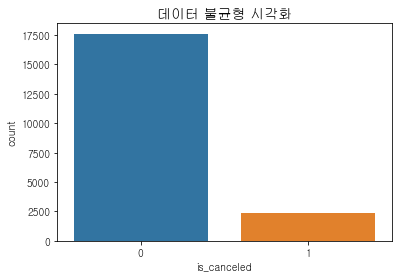

0 비율: 88.0%
1 비율: 12.0%


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path ='C:/Windows/Fonts/NGULIM.TTF'
font = font_manager.FontProperties(fname =font_path).get_name()
rc('font', family =font)

sns.countplot(x='is_canceled', data =hotel_nonull)
plt.title('데이터 불균형 시각화', fontsize =14)
plt.show()
ratio0 = round(len(hotel_nonull[hotel_nonull['is_canceled']==0])/len(hotel_nonull)*100, 2)
ratio1 = round(len(hotel_nonull[hotel_nonull['is_canceled']==1])/len(hotel_nonull)*100, 2)
print('0 비율: {}%'.format(ratio0))
print('1 비율: {}%'.format(ratio1))

#### (6) 기법을 선정한 이유를 작성하고, 원데이터를 포함해 3개의 데이터 세트를 구성하시오.

In [9]:
# 먼저 hotel_null 데이터의 object 형태 변수를 one_hot_encoding함
hotel_nonull=pd.get_dummies(hotel_nonull)

from imblearn.over_sampling import RandomOverSampler, SMOTE
import time
# 원본 데이터 (hotel_nonull)
X = hotel_nonull[hotel_nonull.columns.difference(['is_canceled'])]
y = hotel_nonull['is_canceled']

start = time.time() # 시작 시간 저장
# Random Oversampling
ros = RandomOverSampler(random_state =42)
X_ro, y_ro = ros.fit_resample(X, y)
print('time :', time.time() - start) # 현재시각 - 시작시간 = 실행 시간

time : 0.03690505027770996


In [10]:
start = time.time() # 시작 시간 저장
# SMOTE
sm = SMOTE(random_state =42)
X_sm, y_sm = ros.fit_resample(X, y)
print('time :', time.time() - start) # 현재시각 - 시작시간 = 실행 시간

time : 0.04089760780334473


#### (7) 오버 샘플링 데이터와 원데이터를 사용해 정확도 측면 모델 하나와 속도 측면의 모델 하나를 선정하고, 그 이유를 설명하시오.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

start = time.time() # 시작 시간 저장
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, stratify =y, random_state =100)
clf = RandomForestClassifier(n_estimators =100, min_samples_split =10)
clf.fit(X_train, y_train)
print('train 정확도 :', clf.score(X_train, y_train), '\n')
pred=clf.predict(X_test)
print(classification_report(y_test, pred))
print('time :', time.time() - start) # 현재시각 - 시작시간 = 실행 시간

train 정확도 : 0.933545886471618 

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      3519
           1       0.98      0.44      0.61       480

    accuracy                           0.93      3999
   macro avg       0.95      0.72      0.78      3999
weighted avg       0.93      0.93      0.92      3999

time : 1.8048958778381348


In [12]:
start = time.time() # 시작 시간 저장
X_ro_train, X_ro_test, y_ro_train, y_ro_test = train_test_split(X_ro, y_ro, test_size =0.2, stratify =y_ro, random_state =100)
clf_ro = RandomForestClassifier(n_estimators =100, min_samples_split=10, random_state =100)
clf_ro.fit(X_ro_train, y_ro_train)
print('train 정확도 :', clf_ro.score(X_ro_train, y_ro_train), '\n')
pred_ro=clf_ro.predict(X_ro_test)
print(classification_report(y_ro_test, pred_ro))
print('time :', time.time() - start) # 현재시각 - 시작시간 = 실행 시간

train 정확도 : 0.9849744245524297 

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      3519
           1       0.93      0.98      0.95      3519

    accuracy                           0.95      7038
   macro avg       0.95      0.95      0.95      7038
weighted avg       0.95      0.95      0.95      7038

time : 3.1495416164398193


In [13]:
start = time.time() # 시작 시간 저장
X_sm_train, X_sm_test, y_sm_train, y_sm_test = train_test_split(X_sm, y_sm, test_size =0.2, stratify =y_sm, random_state =100)
clf_sm = RandomForestClassifier(n_estimators =100, min_samples_split=10, random_state =100)
clf_sm.fit(X_sm_train, y_sm_train)
print('train 정확도 :', clf_sm.score(X_sm_train, y_sm_train), '\n')
pred_sm=clf_sm.predict(X_sm_test)
print(classification_report(y_sm_test, pred_sm))
print('time :', time.time() - start) # 현재시각 - 시작시간 = 실행 시간

train 정확도 : 0.9849744245524297 

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      3519
           1       0.93      0.98      0.95      3519

    accuracy                           0.95      7038
   macro avg       0.95      0.95      0.95      7038
weighted avg       0.95      0.95      0.95      7038

time : 2.953019618988037


In [14]:
raw=0 +1.7477023601531982
ro=0.03391218185424805+3.019350051879883
sm=0.0389096736907959+3.2345712184906006
print('원본 데이터세트의 모델링 수행속도: ','\t', raw)
print('RO 데이터세트의 모델링 수행속도: ','\t', ro)
print('SMOTE 데이터세트의 모델링 수행속도: ','\t', sm) 

원본 데이터세트의 모델링 수행속도:  	 1.7477023601531982
RO 데이터세트의 모델링 수행속도:  	 3.053262233734131
SMOTE 데이터세트의 모델링 수행속도:  	 3.2734808921813965


### 2. 통계분석 (50점)

#### 1. 공장에서는 시제품의 농도(%)가 60이라고 주장하며 품질관리팀에서 10개의 샘플을 뽑았다. 유의수준 5%에서 다음을 검정하시오.

In [15]:
x =[52 ,50 ,62 ,75 ,26 ,45 ,62 ,35 ,57 ,14 ]

import numpy as np
moe=5
a=0.05
std = np.std(x)
print(std)

17.434448657758008


In [16]:
from scipy import stats
(stats.t.ppf(q =.05 ,df =9 )*std /5 )**2

40.85590828532381

In [17]:
from scipy import stats
stats.wilcoxon(pd.Series(x)-60)

WilcoxonResult(statistic=9.5, pvalue=0.064453125)

#### 2. 코로나 시계열 데이터로 다음을 수행하시오.

In [18]:
import pandas as pd
covid = pd.read_csv('../data/서울특별시 코로나19.csv')
print (covid.head())
covid1 = covid[covid.columns.difference(['날짜'])]

           날짜    종로구     중구    용산구    성동구    광진구   동대문구     중랑구     성북구  \
0  2022-03-30  37261  33753  55376  81018  96008  95433  103288  116862   
1  2022-03-29  36216  32835  53872  79030  93474  92993  100255  113609   
2  2022-03-28  35276  31878  52391  76802  91030  90277   97419  110583   
3  2022-03-27  34879  31577  51652  76108  89876  89302   96359  109500   
4  2022-03-26  34061  30903  50720  74178  87770  87345   93690  106437   

     강북구  ...     강서구     구로구    금천구    영등포구     동작구     관악구     서초구     강남구  \
0  75118  ...  148359  109973  63687  110293  106238  132305  104368  136200   
1  72934  ...  143573  106162  61840  106171  102955  127626  100529  132333   
2  70754  ...  139633  103573  59946  104109  100665  124805   98869  128813   
3  70003  ...  137908  102610  59393  102916   99426  123374   96873  126296   
4  68329  ...  134285   99938  57925  100349   96989  120413   95124  123992   

      송파구     강동구  
0  176765  121926  
1  172292  118842  
2  16738

In [19]:
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess
def acf(x, n_lags):
    return sm.tsa.stattools.acf(x, nlags =n_lags)

# Max ACF lags
n_lags =785
lag_arr = np.repeat(n_lags, covid1.shape[1])
acf_list = list(map(acf, covid1.transpose().to_numpy(), lag_arr))
acf_df = pd.DataFrame(acf_list).transpose()
acf_df.columns = covid1.columns

acf_df

,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.965594,0.964788,0.964873,0.963102,0.964599,0.965118,0.964896,0.964495,0.962739,0.964677,...,0.964843,0.964386,0.965216,0.963406,0.964211,0.965807,0.963757,0.965624,0.966025,0.964429
2,0.931913,0.930000,0.930425,0.927079,0.930349,0.930705,0.930870,0.929726,0.926474,0.930168,...,0.930035,0.929349,0.930854,0.927777,0.929708,0.932148,0.928512,0.932172,0.932933,0.929547
3,0.898790,0.895648,0.896665,0.891603,0.896316,0.896734,0.897198,0.895662,0.890730,0.895849,...,0.895739,0.894822,0.897147,0.892371,0.895164,0.899075,0.893408,0.899077,0.900435,0.895251
4,0.865697,0.861294,0.862291,0.855502,0.861660,0.862274,0.862796,0.860914,0.854712,0.861332,...,0.860691,0.859554,0.862857,0.856622,0.860051,0.865682,0.858069,0.865542,0.867391,0.860302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,-0.016955,-0.015228,-0.015857,-0.015340,-0.016273,-0.015231,-0.016170,-0.015477,-0.015416,-0.015638,...,-0.015171,-0.015739,-0.015392,-0.015053,-0.016447,-0.017232,-0.015876,-0.017175,-0.017212,-0.016019
781,-0.013717,-0.012334,-0.012831,-0.012420,-0.013163,-0.012320,-0.013083,-0.012523,-0.012501,-0.012644,...,-0.012270,-0.012738,-0.012449,-0.012183,-0.013303,-0.013929,-0.012845,-0.013889,-0.013915,-0.012970
782,-0.010415,-0.009360,-0.009726,-0.009417,-0.009972,-0.009335,-0.009909,-0.009490,-0.009491,-0.009589,...,-0.009290,-0.009646,-0.009434,-0.009239,-0.010075,-0.010562,-0.009744,-0.010519,-0.010542,-0.009829
783,-0.007044,-0.006323,-0.006586,-0.006374,-0.006742,-0.006309,-0.006704,-0.006427,-0.006425,-0.006479,...,-0.006282,-0.006522,-0.006380,-0.006246,-0.006808,-0.007144,-0.006586,-0.007108,-0.007135,-0.006652


In [20]:
acf_df =acf_df.T
acf_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
강남구,1.0,0.965594,0.931913,0.898790,0.865697,0.832537,0.801510,0.769774,0.738757,0.709541,...,-0.031448,-0.028760,-0.025982,-0.023050,-0.020016,-0.016955,-0.013717,-0.010415,-0.007044,-0.003576
강동구,1.0,0.964788,0.930000,0.895648,0.861294,0.827337,0.794486,0.761769,0.729945,0.699790,...,-0.028260,-0.025833,-0.023348,-0.020731,-0.018012,-0.015228,-0.012334,-0.009360,-0.006323,-0.003204
강북구,1.0,0.964873,0.930425,0.896665,0.862291,0.828221,0.792955,0.759475,0.726817,0.695380,...,-0.029677,-0.027141,-0.024501,-0.021740,-0.018874,-0.015857,-0.012831,-0.009726,-0.006586,-0.003344
강서구,1.0,0.963102,0.927079,0.891603,0.855502,0.819774,0.785463,0.750681,0.716584,0.683842,...,-0.028518,-0.026075,-0.023540,-0.020883,-0.018134,-0.015340,-0.012420,-0.009417,-0.006374,-0.003242
관악구,1.0,0.964599,0.930349,0.896316,0.861660,0.827261,0.794470,0.761023,0.728057,0.696761,...,-0.030343,-0.027721,-0.025020,-0.022177,-0.019242,-0.016273,-0.013163,-0.009972,-0.006742,-0.003435


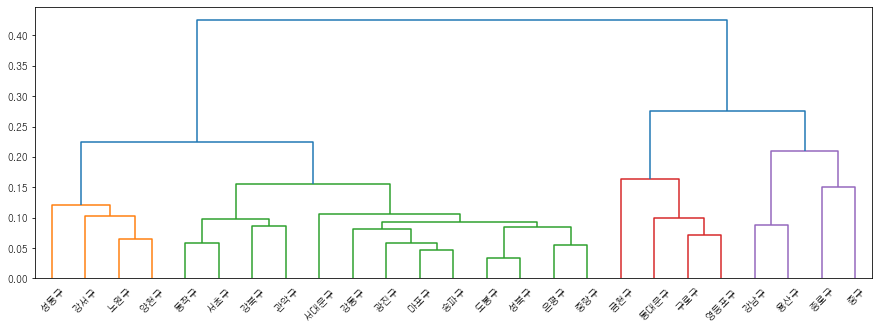

In [21]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path ='C:/Windows/Fonts/NGULIM.TTF'
font = font_manager.FontProperties(fname =font_path).get_name()
rc('font', family =font)

plt.figure(figsize=(15, 5))
label = acf_df.index
dend1=sch.linkage(acf_df, method ='average')
cutoff =0.5 *max(dend1[:,2])
dend_res1=sch.dendrogram(dend1, color_threshold=cutoff, labels=label)
plt.show()

#### 3. 사회과학, 자연과학, 공학 세 개 학과의 평점조사표를 보고 학과와 성적이 관계있는지 검정하시오.

In [22]:
사회 = [16, 30, 12]
자연 = [12, 20, 3]
공학 = [18, 13, 14]
table = pd.DataFrame({'사회과학': 사회,
                     '자연과학': 자연,
                     '공학': 공학},
                     index=['3.5~4.5', '2.5~3.5', '1.5~2.5'])
print (table)

         사회과학  자연과학  공학
3.5~4.5    16    12  18
2.5~3.5    30    20  13
1.5~2.5    12     3  14


In [23]:
from scipy import stats
stats.chi2_contingency(observed=table)

(10.199441509990177,
 0.03719883770303157,
 4,
 array([[19.33333333, 11.66666667, 15.        ],
        [26.47826087, 15.97826087, 20.54347826],
        [12.1884058 ,  7.35507246,  9.45652174]]))